In [336]:
from sympy import Symbol, Interval, Sum, plot, solve, Integer
from sympy.stats import Hypergeometric, density
n1 = Symbol("n1", domain=Interval(0, 1))

In [697]:
maxi, mini = 100, 0

In [781]:
def P(n, maxi=100, mini=0):
    """ P_Slots_slot_Max_Min
    n: cantidad de slots
    m: dado que n1 se coloque en slot m, si None, entonces se coloca en el más óptimo 
    maxi: numero máximo que se puede poner
    mini: numero mínimo que se puede poner
    """
    if n == 1:
        return 1

    dens_f = lambda n, m: dens(n, m, n1, maxi, mini)
    s = 0
    for m, inter in zip(range(1, n+1), opt_gen(n)):
        s += Sum(dens_f(n-1, m) * P(n-1, maxi, n1), (n1, *inter))
    return s/(maxi-mini)

def dens(n, m, n1: Symbol, maxi:int=100, mini:int=0):
    """ mini y maxi ambos incluidos """
    return density(Hypergeometric('H', maxi-mini, maxi-n1, n-1))(n-m)

def opt(n, m, maxi=100, mini=0):
    """ Find the optimal threshold, i.e the cuts between the hypergeometric dist"""
    eq1 = dens(n, m, n1, maxi, mini)
    eq2 = dens(n, m+1, n1, maxi, mini)
    sol = solve(eq1- eq2)[0]
    if isinstance(sol, Integer):
        return sol
    else:
        # repiensa esto un poco
        return int(sol) if eq1.subs(n1, int(sol)) > eq2.subs(n1, int(sol)) else int(sol)+1
    
def opt_gen(n, maxi=100, mini=0):
    dens_f = lambda n, m: dens(n, m, n1, maxi, mini)
    a, b = mini, None
    for m in range(1, n):
        sol = solve(dens_f(n, m)- dens_f(n, m+1))
        # rethink the fractions, as they may introduce errors if the left side is actually smaller than the right side 
        # i think never case in left side, but allways after n1 is half of maxi
        # i could just find the max and then the next intersection or something like that
        # print(sol)
        b = int(sol[0] if sol[0] not in (mini, maxi) else sol[1]) 
        yield a,b
        a = b + 1   
    yield a, maxi


In [779]:
list(opt_gen(3))

[(0, 33), (34, 67), (68, 100)]

In [786]:
P(2, 1000, 0)

Sum(0, (n1, 51, 100))/1000 + Sum(1, (n1, 0, 50))/1000

In [801]:
n = 2
dens_f = lambda n, m: dens(n, m, n1, maxi, mini)
s = 0
for m, inter in zip(range(1, n+1), opt_gen(n)):
    s += Sum(dens_f(n-1, m) * P(n-1, maxi, n1), (n1, *inter))
s/=(maxi-mini)

In [804]:
s

Sum(0, (n1, 51, 100))/100 + Sum(1, (n1, 0, 50))/100

In [811]:
dens(2, 1, n1, maxi, mini)

1 - n1/100

In [739]:
list(opt_gen(4))

[(0, 24), (25, 50), (51, 1), (2, 100)]

In [646]:
[dens_f(n, m) for m  in range(1, n+1)]

[binomial(9 - n1, 4)/126,
 n1*binomial(9 - n1, 3)/126,
 binomial(n1, 2)*binomial(9 - n1, 2)/126,
 (9 - n1)*binomial(n1, 3)/126,
 binomial(n1, 4)/126]

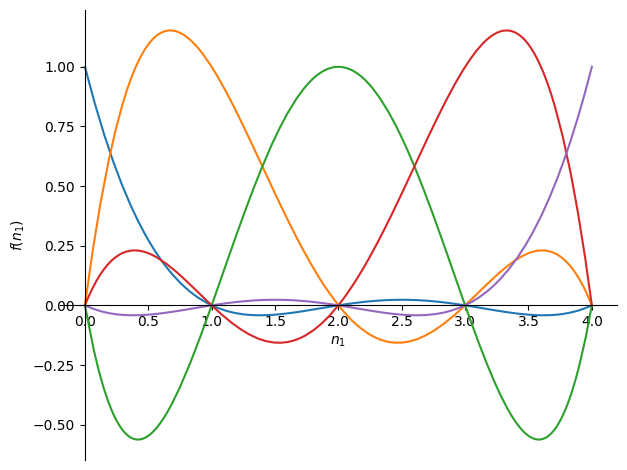

In [641]:
# same number of numbers and slots, the probability is 1 if put at index , 0 else
n = 5
mini = 0 # incluido tmb
maxi = n-1 # incluido
dens_f = lambda n, m: dens(n, m, n1, maxi, mini)
plot(*[dens_f(n, m) for m  in range(1, n+1)], (n1, mini, maxi))

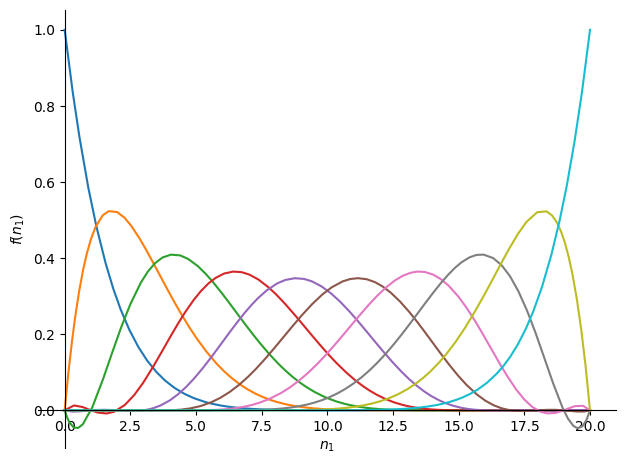

In [556]:
n = 10
mini = 0 # incluido tmb
maxi = 20 # incluido #   AUNQUE en python normalmente los upper intervals no son incluidos!
dens_f = lambda n, m: dens(n, m, n1, maxi, mini)
plot(*[dens_f(n, m) for m  in range(1, n+1)], (n1, mini, maxi))

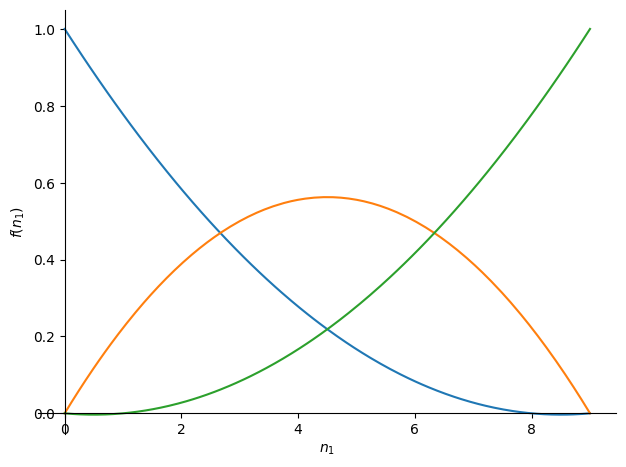

In [530]:
# the fact that goes negative is not a problem, the important is that is
# zero in the two last!
plot(dens_f(3,1 ), dens_f(3,2 ), dens_f(3,3 ), (n1,0,9))
# la probabilidad de ganar siendo que pones n1 en la primera posición  pues se va a cero rapido, ya que 
# si el numero es muy grande pues no van a quedar numeros para poner luego.

-0.00222222222222222

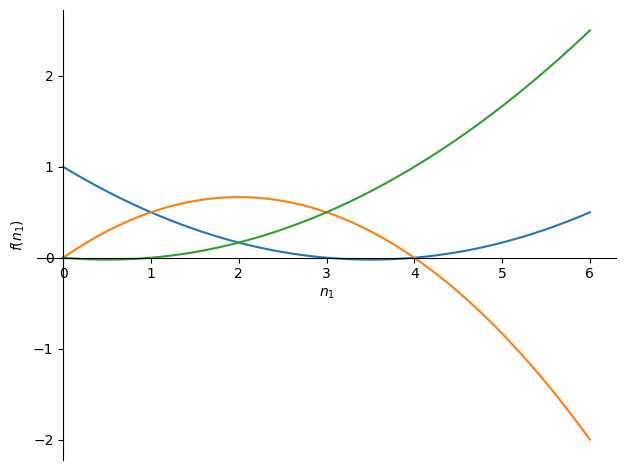

In [526]:
def dens(n, m, n1, maxi=4, mini=0):
    return density(Hypergeometric('H', maxi-mini, maxi-n1, n-1))(n-m)

plot(dens(3,1,n1), dens(3,2, n1 ), dens(3,3,n1 ), (n1,0,6))

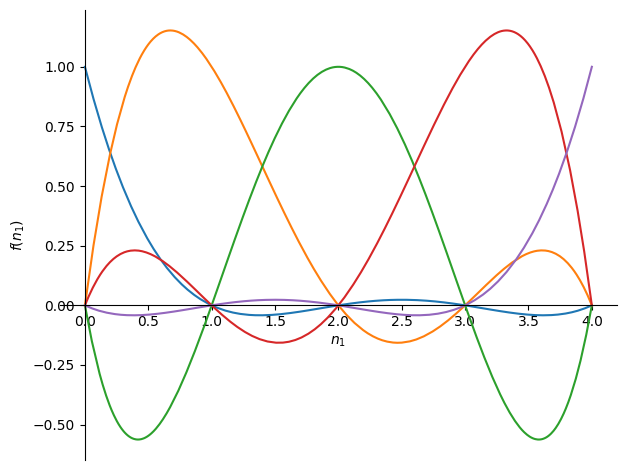

In [528]:
# this is very interesting and accurrate, cause if there is the same number of slots and balls, 
# then the only chance of putting all sorted is putting them by the index
plot(dens(5,1,n1), dens(5,2, n1 ), dens(5,3,n1 ), dens(5,4,n1 ), dens(5,5,n1 ), (n1,0,4))

In [2]:
a = 1 
b = 2 

def suma(a:int, b:int) -> int:
    return a+b

b = suma('a',4)



TypeError: can only concatenate str (not "int") to str